<a href="https://colab.research.google.com/github/ldocarvalho/Analise-Grupos-Wine/blob/main/TP3_AnaliseGrupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------
**2020/2** 

**Tópicos Especiais em Arquitetura de Computadores**

**TP03 - Análise de Grupos**

Lucas de Oliveira Carvalho

Lucas Luis de Souza Barreto

-----------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np
import seaborn as sns
import random
import math

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# 1) Alcohol
# 2) Malic acid
# 3) Ash
# 4) Alcalinity of ash
# 5) Magnesium
# 6) Total phenols
# 7) Flavanoids
# 8) Nonflavanoid phenols
# 9) Proanthocyanins
# 10) Color intensity
# 11) Hue
# 12) OD280/OD315 of diluted wines
# 13) Proline

columns_names_wines = ["Class", "Alcohol","Malic", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins", "Color", "Hue", "OD280", "Proline"]
dfWines = pd.read_csv('https://raw.githubusercontent.com/ldocarvalho/Analise-Grupos-Wine/main/wine.csv', names=columns_names_wines)
dfWines

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Exercício 1 - Pré-Processamento

Objetivo: fazer o pré-processamento dos dados de tal forma que todos os atributos estejam normalizados no intervalo [0,1].

In [ ]:
dfWines.drop("Class", inplace=True, axis=1)
dfWines.head(10)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
dfWines = (dfWines-dfWines.min()) / (dfWines.max() - dfWines.min())
dfWines.head(10)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
5,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
9,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076


#### Exercício 2 - Redução com Principal Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = columns_names_wines[1:]
values = dfWines.loc[:, features].values

values = StandardScaler().fit_transform(values)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(values)
dfWines_reduced = pd.DataFrame(data = principal_components, columns = ['x', 'y'])
dfWines_reduced

,x,y
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


#### Exercício 3 - Medidas de Similaridade

Objetivo: calcular a similaridade entre objetos a partir de duas medidas, a distância Euclidiana e a correlação de Pearson.

In [ ]:
def euclidian_distance(x, y):
  return distance.euclidean(x, y)

def pearsons_correlation_coefficient(i, j):
  v1 = 0
  v2 = 0
  v3 = 0
  for k in range(len(i)):
    v1 += (i[k] - dfWines_reduced['x'].mean()) * (j[k] - dfWines_reduced['y'].mean()) 
    v2 += (i[k] - dfWines_reduced['x'].mean())**2
    v3 += (j[k] - dfWines_reduced['y'].mean())**2
  
  return v1/(math.sqrt(v2)*math.sqrt(v3))

def manhattan_distance(a, b):
   return sum(abs(val1-val2) for val1, val2 in zip(a,b)) 

#### Exercício 4 - Algoritmos de Agrupamento 

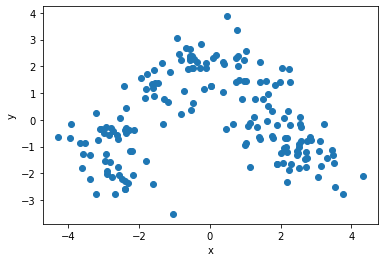

In [ ]:
plt.scatter(x=dfWines_reduced.x, y=dfWines_reduced.y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### K-Means

###### Elbow curve: curva para descobrir o número ideal de clusters (K)

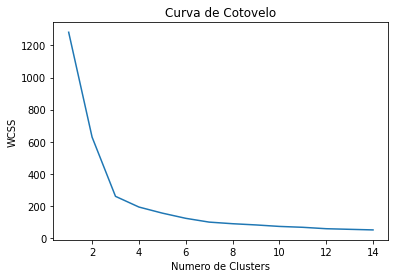

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfWines_reduced)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

###### Distância Euclidiana

In [ ]:
def funcao_custo(dados, rotulo, centroides):
  fc = 0
  for i in range(len(dados)):
    fc+= euclidian_distance(dados[i],centroides[int(rotulo[i])])
  return fc

def dist(dados, centroides):
  D = []
  for obj in dados.values:
    #print(obj)
    DAux = []
    for c in centroides.values:
      DAux.append(euclidian_distance(obj,c))
    D.append(DAux)
  return D

def media(dados):
  xm = 0
  ym = 0
  for d in dados.values:
    xm+=d[0]
    ym+=d[1]
  xm=xm/len(dados)
  ym=ym/len(dados)
  return [xm,ym]

In [ ]:
idx = np.random.randint(0, len(dfWines_reduced), 3)
idx

array([151, 145,  28])

In [ ]:
k = 3
C_Euclidean = dfWines_reduced.loc[idx]
C_Euclidean = C_Euclidean.astype(np.float)
G_kmeans_Euclidean = np.zeros(len(dfWines_reduced.values))
dif_fc = 1
fc=0
it = 0
C_Euclidean

,x,y
151,-2.549831,-2.045283
145,-2.625621,-0.563161
28,2.188406,-0.689570


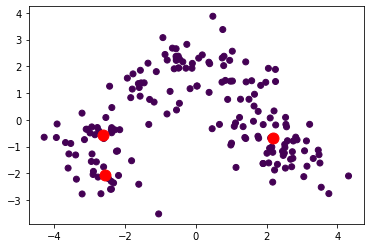

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_kmeans_Euclidean)
plt.scatter(C_Euclidean.values[:,0],C_Euclidean.values[:,1],s = 120,c='red')
plt.show()

In [ ]:
while dif_fc != 0:
  print(it)
  #Calcular a Distancia entre os Centroides e os Objetox
  D = dist(dfWines_reduced,C_Euclidean)
  #Determinar o Centroide mais perto para cada objeto
  for i in range(len(dfWines_reduced.values)):
    #print(D[i])
    #print(np.argmin(D[i]))
    G_kmeans_Euclidean[i] = np.argmin(D[i])
    
  #Atualizar a posicao dos Centroides
  for i in range(k):
    #Encontrar os objetos de cada grupo
    ids = []
    for j in range(len(dfWines_reduced.values)):
      if G_kmeans_Euclidean[j]==i :
        ids.append(j)
    #Calcular o ponto médio do grupo
    C_Euclidean.values[i] = media(dfWines_reduced.loc[ids])
  #Calcular o nova funcao de custo do novo agrupamento
  fc_nova = funcao_custo(dfWines_reduced.values,G_kmeans_Euclidean,C_Euclidean.values)

  #Atualizando as variáveis de controle
  if fc == 0:
    dif_fc = fc_nova
  else:
    dif_fc = fc - fc_nova
  fc = fc_nova
  it=it+1

0
1
2
3
4
5
6


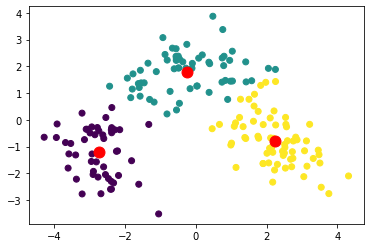

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_kmeans_Euclidean)
plt.scatter(C_Euclidean.values[:,0],C_Euclidean.values[:,1],s = 120,c='red')
plt.show()

###### Correlação de Pearson 

In [ ]:
def funcao_custo(dados, rotulo, centroides):
  fc = 0
  for i in range(len(dados)):
    fc+= pearsons_correlation_coefficient(dados[i],centroides[int(rotulo[i])])
  return fc

def dist(dados, centroides):
  D = []
  for obj in dados.values:
    #print(obj)
    DAux = []
    for c in centroides.values:
      DAux.append(pearsons_correlation_coefficient(obj,c))
    D.append(DAux)
  return D

def media(dados):
  xm = 0
  ym = 0
  for d in dados.values:
    xm+=d[0]
    ym+=d[1]
  xm=xm/len(dados)
  ym=ym/len(dados)
  return [xm,ym]

In [ ]:
idx = np.random.randint(0, len(dfWines_reduced), 3)
idx

array([ 32, 153,  55])

In [ ]:
k = 3
C_Pearson = dfWines_reduced.loc[idx]
C_Pearson = C_Pearson.astype(np.float)
G_kmeans_Pearson = np.zeros(len(dfWines_reduced.values))
dif_fc = 1
fc=0
it = 0
C_Pearson

,x,y
32,1.628579,-0.052704
153,-2.760145,-2.138932
55,2.469329,-1.329008


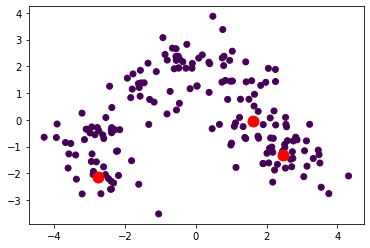

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_kmeans_Pearson)
plt.scatter(C_Pearson.values[:,0],C_Pearson.values[:,1],s = 120,c='red')
plt.show()

In [ ]:
for l in range(100):
  print(it)
  #Calcular a Distancia entre os Centroides e os Objetox
  D = dist(dfWines_reduced,C_Pearson)
  #Determinar o Centroide mais perto para cada objeto
  for i in range(len(dfWines_reduced.values)):
    #print(D[i])
    #print(np.argmin(D[i]))
    G_kmeans_Pearson[i] = np.argmin(D[i])
    
  #Atualizar a posicao dos Centroides
  for i in range(k):
    #Encontrar os objetos de cada grupo
    ids = []
    for j in range(len(dfWines_reduced.values)):
      if G_kmeans_Pearson[j]==i :
        ids.append(j)
    #Calcular o ponto médio do grupo
    print(ids)
    C_Pearson.values[i] = media(dfWines_reduced.loc[ids])
  #Calcular o nova funcao de custo do novo agrupamento
  fc_nova = funcao_custo(dfWines_reduced.values,G_kmeans_Pearson,C_Pearson.values)

  #Atualizando as variáveis de controle
  if fc == 0:
    dif_fc = fc_nova
  else:
    dif_fc = fc - fc_nova
  fc = fc_nova
  it=it+1

0
[83, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63, 65, 66, 67, 69, 71, 73, 74, 76, 78, 79, 80, 81, 84, 85, 93, 94, 95, 97, 98, 99, 100, 104, 108, 109, 110, 115, 117, 120, 121, 124, 125, 126]
[59, 60, 61, 64, 68, 70, 72, 75, 77, 82, 86, 87, 88, 89, 90, 91, 92, 96, 101, 102, 103, 105, 106, 107, 111, 112, 113, 114, 116, 118, 119, 122, 123, 127, 128, 129]
1
[1, 9, 12, 20, 21, 22, 23, 24, 27, 28, 29, 32, 35, 37, 38, 40, 41, 44, 47, 50, 51, 62, 63, 65, 66, 67, 69, 71, 73, 74, 76, 78, 79, 80, 81, 84, 85, 93, 94, 95, 97, 98, 99, 100, 102, 104, 106, 108, 109, 110, 111, 11

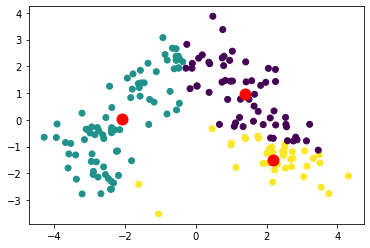

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_kmeans_Pearson)
plt.scatter(C_Pearson.values[:,0],C_Pearson.values[:,1],s = 120,c='red')
plt.show()

##### DBScan

###### Distância Euclidiana

In [ ]:
minPts = 5
raio = 0.60

In [ ]:
def dbscan_distance_euclidian(data):
  distances = []
  for x1 in data:
    line_distance = []
    for x2 in data:
      line_distance.append(euclidian_distance(x1, x2))
    distances.append(line_distance)
  return distances

In [ ]:
distances = dbscan_distance_euclidian(dfWines_reduced.values)
visited = np.zeros(len(dfWines_reduced))
label = 1
G_dbscan_Euclidean = -1*np.ones(len(dfWines_reduced))

In [ ]:

for i in range(len(dfWines_reduced.values)):
  if visited[i] == 0:
    visited[i] = 1
    vizinhos = []
    for j in range(len(dfWines_reduced.values)):
      if distances[i][j]<=raio:
        vizinhos.append(j)
      
    if len(vizinhos)>=minPts:
      G_dbscan_Euclidean[i] =label
      v=0
      while v<len(vizinhos):
        if (visited[vizinhos[v]]==0) or (G_dbscan_Euclidean[vizinhos[v]]==-1):
          aux  = [] 
          for j2 in range(len(dfWines_reduced.values)):
            if distances[vizinhos[v]][j2] <=raio :
                vizinhos.append(j2)

          visited[vizinhos[v]] = 1
        G_dbscan_Euclidean[vizinhos[v]] = label
        v+=1
      label+=1

In [ ]:
G_dbscan_Euclidean

array([ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2., -1., -1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

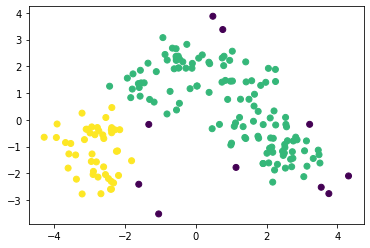

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_dbscan_Euclidean)
plt.show()

###### Distância de Manhattan

In [ ]:
minPts = 3
raio = 0.80

In [ ]:
def dbscan_distance_manhattan(data):
  distances = []
  for x1 in data:
    line_distance = []
    for x2 in data:
      line_distance.append(manhattan_distance(x1, x2))
    distances.append(line_distance)
  return distances

In [ ]:
distances = dbscan_distance_manhattan(dfWines_reduced.values)
visited = np.zeros(len(dfWines_reduced))
label = 1
G_dbscan_Manhattan = -1*np.ones(len(dfWines_reduced))

In [ ]:

for i in range(len(dfWines_reduced.values)):
  if visited[i] == 0:
    visited[i] = 1
    vizinhos = []
    for j in range(len(dfWines_reduced.values)):
      if abs(distances[i][j])<=raio:
        vizinhos.append(j)
      
    if len(vizinhos)>=minPts:
      G_dbscan_Manhattan[i] =label
      v=0
      while v<len(vizinhos):
        if (visited[vizinhos[v]]==0) or (G_dbscan_Manhattan[vizinhos[v]]==-1):
          aux  = [] 
          for j2 in range(len(dfWines_reduced.values)):
            if distances[vizinhos[v]][j2] <=raio :
                vizinhos.append(j2)

          visited[vizinhos[v]] = 1
        G_dbscan_Manhattan[vizinhos[v]] = label
        v+=1
      label+=1

In [ ]:
G_dbscan_Manhattan

array([ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2., -1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

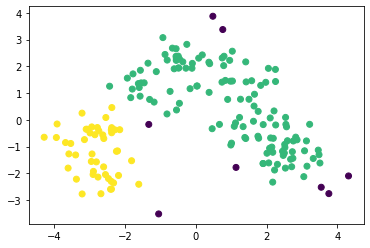

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_dbscan_Manhattan)
plt.show()

#### Exercício 5 - Centroides K-Means

In [ ]:
print("Centróides - Distância Euclidiana")
for centroid in C_Euclidean.values:
  print("Centróide: ", centroid)

print("")

print("Centróides - Distância de Pearson")
for centroid in C_Pearson.values:
  print("Centróide: ", centroid)

Centróides - Distância Euclidiana
Centróide:  [-2.74392982 -1.2141906 ]
Centróide:  [-0.25245407  1.79727782]
Centróide:  [ 2.24036885 -0.77516247]

Centróides - Distância de Pearson
Centróide:  [1.38200347 0.96016747]
Centróide:  [-2.08480418  0.01510274]
Centróide:  [ 2.18579818 -1.48354101]


#### Exercício 6 - Atributos Ordenados

In [ ]:
G_kmeans_Euclidean

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
grupoKmeansEuclidean = []
for i in range(len(G_kmeans_Euclidean)):
  grupoKmeansEuclidean.append([list(dfWines_reduced.iloc[i].values),int(G_kmeans_Euclidean[i])])

pd.DataFrame(grupoKmeansEuclidean, columns=["Coordenada do Dado", "Grupo"]).sort_values(by='Grupo')

,Coordenada do Dado,Grupo
177,"[-3.2087581641980236, -2.768919566047572]",0
149,"[-2.8996593330239127, -2.0410570079384636]",0
148,"[-2.8070637200816604, -1.5705337870411966]",0
147,"[-3.5826413720011066, -1.2727027497272991]",0
146,"[-4.28063877875109, -0.6496709640237063]",0
...,...,...
34,"[1.4103885265954061, -0.6979343246113573]",2
33,"[1.9026908622381478, -1.6330604347699846]",2
32,"[1.6285791164309185, -0.052704450575324926]",2
47,"[2.821339274192248, -0.6462585991417067]",2


In [ ]:
grupoKmeansPearson = []
for i in range(len(G_kmeans_Pearson)):
  grupoKmeansPearson.append([list(dfWines_reduced.iloc[i].values),int(G_kmeans_Pearson[i])])

pd.DataFrame(grupoKmeansPearson, columns=["Coordenada do Dado", "Grupo"]).sort_values(by='Grupo')

,Coordenada do Dado,Grupo
67,"[0.18338402668475604, 2.4271461147035702]",0
95,"[2.5438651841995537, -0.16927402279974094]",0
32,"[1.6285791164309185, -0.052704450575324926]",0
94,"[0.9574553638036433, 2.2235284346674615]",0
93,"[0.7466659419884518, 2.3129317092207407]",0
...,...,...
107,"[-1.6206725727874796, 1.3555833880259585]",2
106,"[-0.3662673573520641, 2.1693532978292835]",2
105,"[-1.772499077960035, 1.7172884693761445]",2
101,"[-0.549531726649465, 2.293128643245626]",2


In [ ]:
grupoDbScanEuclidean = []
for i in range(len(G_dbscan_Euclidean)):
  grupoDbScanEuclidean.append([list(dfWines_reduced.iloc[i].values),int(G_dbscan_Euclidean[i])])

pd.DataFrame(grupoDbScanEuclidean, columns=["Coordenada do Dado", "Grupo"]).sort_values(by='Grupo')

,Coordenada do Dado,Grupo
18,"[3.541985081943469, -2.51834366930665]",-1
50,"[3.2149174747738227, -0.16699199499679399]",-1
80,"[0.7620639041096007, 3.3750538099635357]",-1
14,"[4.31278390676556, -2.0959755753412663]",-1
45,"[1.1361661775610163, -1.7771073929776402]",-1
...,...,...
148,"[-2.8070637200816604, -1.5705337870411966]",2
149,"[-2.8996593330239127, -2.0410570079384636]",2
150,"[-2.320736976549206, -2.3563660755566724]",2
152,"[-1.8125412848422984, -1.527645946268748]",2


In [ ]:
grupoDbScanManhattan = []
for i in range(len(G_dbscan_Manhattan)):
  grupoDbScanManhattan.append([list(dfWines_reduced.iloc[i].values),int(G_dbscan_Manhattan[i])])

pd.DataFrame(grupoDbScanManhattan, columns=["Coordenada do Dado", "Grupo"]).sort_values(by='Grupo')

,Coordenada do Dado,Grupo
115,"[0.4820744097730959, 3.871783848407241]",-1
158,"[-1.0481818968536787, -3.5150896912197283]",-1
130,"[-1.3271016561416027, -0.17038923204902762]",-1
3,"[3.7570656097732025, -2.7563719137107148]",-1
18,"[3.541985081943469, -2.51834366930665]",-1
...,...,...
148,"[-2.8070637200816604, -1.5705337870411966]",2
149,"[-2.8996593330239127, -2.0410570079384636]",2
150,"[-2.320736976549206, -2.3563660755566724]",2
152,"[-1.8125412848422984, -1.527645946268748]",2


#### Exercício 7 - Visualização dos dados

###### K-Means com Distância Euclidiana

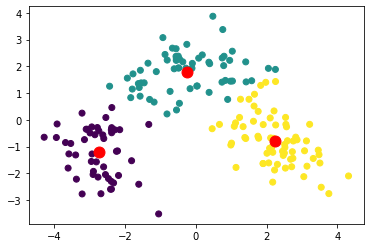

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_kmeans_Euclidean)
plt.scatter(C_Euclidean.values[:,0],C_Euclidean.values[:,1],s = 120,c='red')
plt.show()

###### K-Means com Correlação de Pearson

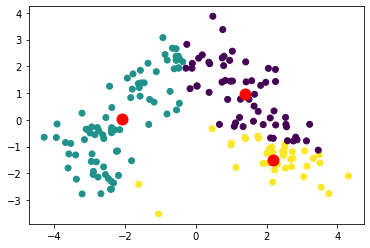

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_kmeans_Pearson)
plt.scatter(C_Pearson.values[:,0],C_Pearson.values[:,1],s = 120,c='red')
plt.show()

###### DBScan com Distância Euclidiana

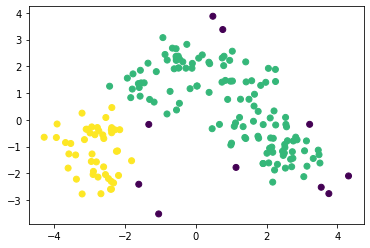

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_dbscan_Euclidean)
plt.show()

###### DBScan com Distância Manhattan

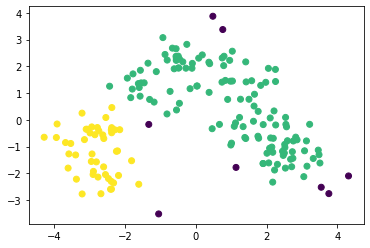

In [ ]:
plt.scatter(dfWines_reduced["x"], dfWines_reduced["y"],c=G_dbscan_Manhattan)
plt.show()

#### Exercício 8 - Avaliação dos agrupamentos

###### Índice de Dunn - K-Means com Distância Euclidiana

In [ ]:
#Numero de Grupos
k = 3
dfLabel = pd.DataFrame(G_kmeans_Euclidean)
intraGrupos = []

for i in range(k):
  objetosGrupoi = dfWines_reduced.iloc[dfLabel[dfLabel[0]==i].index].values

  distanciasIntraGi = []
  for i1 in range(len(objetosGrupoi)):
    for i2 in range(i1+1,len(objetosGrupoi)):
      distanciasIntraGi.append(distance.euclidean(objetosGrupoi[i1],objetosGrupoi[i2]))

  intraGrupos.append(max(distanciasIntraGi))

intraGrupos

[4.969098735199037, 4.218701005232884, 4.235914914442084]

In [ ]:
maxIntraGrupos = max(intraGrupos)
maxIntraGrupos

4.969098735199037

In [ ]:
def interGiGj(grupoI, grupoJ):
  soma = 0
  for i in range(len(grupoI)):
    for j in range(len(grupoJ)):
      soma+=distance.euclidean(grupoI[i],grupoJ[j])
  
  return soma*(1/(len(grupoI)*len(grupoJ)))


In [ ]:
interGrupos = []
for i in range(k):
  for j in range(i+1,k):
    interGrupos.append(interGiGj(dfWines_reduced.iloc[dfLabel[dfLabel[0]==i].index].values, dfWines_reduced.iloc[dfLabel[dfLabel[0]==j].index].values))

interGrupos

[4.167625106693842, 5.190235294694085, 3.770346681311093]

In [ ]:
minInterGrupos = min(interGrupos)
minInterGrupos

3.770346681311093

In [ ]:
indDunnOKmeansEuclidean = minInterGrupos/maxIntraGrupos
indDunnOKmeansEuclidean

0.7587586566963378

###### Índice de Dunn - K-Means com Distância de Pearson

In [ ]:
#Numero de Grupos
k = 3
dfLabel = pd.DataFrame(G_kmeans_Pearson)
print(dfLabel)
intraGrupos = []

for i in range(k):
  objetosGrupoi = dfWines_reduced.iloc[dfLabel[dfLabel[0]==i].index].values

  distanciasIntraGi = []
  for i1 in range(len(objetosGrupoi)):
    for i2 in range(i1+1,len(objetosGrupoi)):
      distanciasIntraGi.append(distance.euclidean(objetosGrupoi[i1],objetosGrupoi[i2]))

  intraGrupos.append(max(distanciasIntraGi))

intraGrupos

       0
0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
..   ...
173  2.0
174  2.0
175  2.0
176  2.0
177  2.0

[178 rows x 1 columns]


[5.820756787599204, 5.930838169745031, 6.271595346203353]

In [ ]:
maxIntraGrupos = max(intraGrupos)
maxIntraGrupos

6.271595346203353

In [ ]:
def interGiGj(grupoI, grupoJ):
  soma = 0
  for i in range(len(grupoI)):
    for j in range(len(grupoJ)):
      soma+=distance.euclidean(grupoI[i],grupoJ[j])
  
  return soma*(1/(len(grupoI)*len(grupoJ)))


In [ ]:
interGrupos = []
for i in range(k):
  for j in range(i+1,k):
    interGrupos.append(interGiGj(dfWines_reduced.iloc[dfLabel[dfLabel[0]==i].index].values, dfWines_reduced.iloc[dfLabel[dfLabel[0]==j].index].values))

interGrupos

[2.931403044178537, 4.090158374760398, 4.955435425718247]

In [ ]:
minInterGrupos = min(interGrupos)
minInterGrupos

2.931403044178537

In [ ]:
indDunnOKmeansPearson = minInterGrupos/maxIntraGrupos
indDunnOKmeansPearson

0.4674094679837923

###### Índice de Dunn - DBScan com Distância Euclidiana

In [ ]:
#Numero de Grupos
k = 2
dfLabel = pd.DataFrame(G_dbscan_Euclidean)
intraGrupos = []

for i in range(k):
  objetosGrupoi = dfWines_reduced.iloc[dfLabel[dfLabel[0]==i+1].index].values
  distanciasIntraGi = []
  for i1 in range(len(objetosGrupoi)):
    for i2 in range(i1+1,len(objetosGrupoi)):
      distanciasIntraGi.append(distance.euclidean(objetosGrupoi[i1],objetosGrupoi[i2]))

  intraGrupos.append(max(distanciasIntraGi))

intraGrupos

[6.595707187345268, 3.3357604177497517]

In [ ]:
maxIntraGrupos = max(intraGrupos)
maxIntraGrupos

6.595707187345268

In [ ]:
def interGiGj(grupoI, grupoJ):
  soma = 0
  for i in range(len(grupoI)):
    for j in range(len(grupoJ)):
      soma+=distance.euclidean(grupoI[i],grupoJ[j])
  
  return soma*(1/(len(grupoI)*len(grupoJ)))


In [ ]:
interGrupos = []
for i in range(k):
  for j in range(i+1,k):
    interGrupos.append(interGiGj(dfWines_reduced.iloc[dfLabel[dfLabel[0]==i+1].index].values, dfWines_reduced.iloc[dfLabel[dfLabel[0]==j+1].index].values))

interGrupos

[4.606457625709083]

In [ ]:
minInterGrupos = min(interGrupos)
minInterGrupos

4.606457625709083

In [ ]:
indDunnODbScanEuclidean = minInterGrupos/maxIntraGrupos
indDunnODbScanEuclidean

0.69840238428825

###### Índice de Dunn - DBScan com Distância de Manhattan

In [ ]:
#Numero de Grupos
k = 2
dfLabel = pd.DataFrame(G_dbscan_Manhattan)
intraGrupos = []

for i in range(k):
  objetosGrupoi = dfWines_reduced.iloc[dfLabel[dfLabel[0]==i+1].index].values
  distanciasIntraGi = []
  for i1 in range(len(objetosGrupoi)):
    for i2 in range(i1+1,len(objetosGrupoi)):
      distanciasIntraGi.append(distance.euclidean(objetosGrupoi[i1],objetosGrupoi[i2]))

  intraGrupos.append(max(distanciasIntraGi))

intraGrupos

[6.595707187345268, 3.3357604177497517]

In [ ]:
maxIntraGrupos = max(intraGrupos)
maxIntraGrupos

6.595707187345268

In [ ]:
def interGiGj(grupoI, grupoJ):
  soma = 0
  for i in range(len(grupoI)):
    for j in range(len(grupoJ)):
      soma+=distance.euclidean(grupoI[i],grupoJ[j])
  
  return soma*(1/(len(grupoI)*len(grupoJ)))


In [ ]:
interGrupos = []
for i in range(k):
  for j in range(i+1,k):
    interGrupos.append(interGiGj(dfWines_reduced.iloc[dfLabel[dfLabel[0]==i+1].index].values, dfWines_reduced.iloc[dfLabel[dfLabel[0]==j+1].index].values))

interGrupos

[4.613912268177583]

In [ ]:
minInterGrupos = min(interGrupos)
minInterGrupos

4.613912268177583

In [ ]:
indDunnODbScanManhattan = minInterGrupos/maxIntraGrupos
indDunnODbScanManhattan

0.699532610700181

###### Índice de Silhueta - K-Means com Distância Euclidiana

In [ ]:
def A(j,dados, labels):
  soma = 0
  grupoJ = labels.loc[j].values[0]
  for dadosGrupo in dados.iloc[labels[labels[0]==grupoJ].index].values:
    soma += distance.euclidean(dados.iloc[labels[labels[0]==grupoJ].index].loc[j], dadosGrupo)
  return soma/(len(dados.iloc[labels[labels[0]==grupoJ].index].values)-1)

In [ ]:
def B(k,i,j,dados,labels):
  grupos = list(range(k))
  grupos.remove(i)
  distanciasMediasGrupos = []
  for grupo in grupos:
    soma=0
    for dado in dados.iloc[labels[labels[0]==grupo].index].values:
      soma+= distance.euclidean(dados.iloc[labels[labels[0]==i].index].loc[j],dado)
    distanciasMediasGrupos.append(soma/len(dados.iloc[labels[labels[0]==grupo].index].values))
  return min(distanciasMediasGrupos)

In [ ]:
k = 3
dfLabel = pd.DataFrame(G_kmeans_Euclidean)
somaSilhAgrupamento = 0
for i in range(k):
  somaSilhGrupo = 0
  for j in dfLabel[dfLabel[0]==i].index:
    aj = A(j,dfWines_reduced,dfLabel)
    bj = B(k,i,j,dfWines_reduced,dfLabel)

    somaSilhGrupo += round((bj-aj)/max([bj,aj]),2)

  somaSilhAgrupamento += round(somaSilhGrupo/len(dfLabel[dfLabel[0]==i].index),2)

IndiceSilhKmeansEuclidean = round(somaSilhAgrupamento/k,2)
IndiceSilhKmeansEuclidean

0.57

###### Índice de Silhueta - K-Means com Distância de Pearson

In [ ]:
k = 3
dfLabel = pd.DataFrame(G_kmeans_Pearson)
somaSilhAgrupamento = 0
for i in range(k):
  somaSilhGrupo = 0
  for j in dfLabel[dfLabel[0]==i].index:
    aj = A(j,dfWines_reduced,dfLabel)
    bj = B(k,i,j,dfWines_reduced,dfLabel)

    somaSilhGrupo += round((bj-aj)/max([bj,aj]),2)

  somaSilhAgrupamento += round(somaSilhGrupo/len(dfLabel[dfLabel[0]==i].index),2)

IndiceSilhKmeansPearson = round(somaSilhAgrupamento/k,2)
IndiceSilhKmeansPearson

0.35

###### Índice de Silhueta - DBScan com Distância Euclidiana

In [ ]:
k = 2
dfLabel = pd.DataFrame(G_dbscan_Euclidean)
somaSilhAgrupamento = 0
for i in range(k):
  somaSilhGrupo = 0
  for j in dfLabel[dfLabel[0]==i+1].index:
    aj = A(j,dfWines_reduced,dfLabel)
    bj = B(k,i,j,dfWines_reduced,dfLabel)

    somaSilhGrupo += round((bj-aj)/max([bj,aj]),2)

  somaSilhAgrupamento += round(somaSilhGrupo/len(dfLabel[dfLabel[0]==i+1].index),2)

IndiceSilhDbScanEuclidean = round(somaSilhAgrupamento/k,2)
IndiceSilhDbScanEuclidean

KeyError: ignored

###### Índice de Silhueta - DBScan com Distância de Manhattan